# High school contact and friendship networks

### Group: Abdelmalek Hajjam, Monu Chacko


Data Source: http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/

This dataset correspond to the contacts and friendship relations between students in a high school in Marseilles, France, in December 2013, as measured through several techniques.

It gives the contacts of the students of nine classes during 5 days in Dec. 2013, as measured by the SocioPatterns infrastructure. The file contains a tab-separated list representing the active contacts during 20-second intervals of the data collection. Each line has the form “t i j Ci Cj“, where i and j are the anonymous IDs of the persons in contact, Ci and Cj are their classes, and the interval during which this contact was active is [ t – 20s, t ]. If multiple contacts are active in a given interval, you will see multiple lines starting with the same value of t. Time is measured in seconds.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pylab as pyplot
import scipy.stats

import nxviz as nv
from pyvis import network as net
%matplotlib inline

In [2]:
hight_school = pd.read_csv('High-School_data_2013.csv', 
                     delimiter = ' ', 
                     header=None, 
                     names=['timestamp','node_from', 'node_to', 'classname_from', 'classname_to'])


In [3]:
# built the graph from the pandas dataset school
G = nx.from_pandas_edgelist(hight_school, 'node_from', 'node_to', 'timestamp')

In [4]:
numNodes = len(G.nodes())
print("# Nodes: ",numNodes)
print("# Edges: ", len(G.edges()))

#return the list of nodes and their degree of centrality <nx.degree_centrality(G)>
list(nx.degree_centrality(G).items())

# Nodes:  327
# Edges:  5818


[(454, 0.07975460122699386),
 (640, 0.08895705521472393),
 (1, 0.0705521472392638),
 (939, 0.11042944785276074),
 (185, 0.13190184049079756),
 (258, 0.10429447852760737),
 (55, 0.08588957055214724),
 (170, 0.10122699386503067),
 (9, 0.2116564417177914),
 (453, 0.08282208588957056),
 (45, 0.1901840490797546),
 (14, 0.11656441717791412),
 (190, 0.147239263803681),
 (400, 0.06134969325153374),
 (637, 0.07975460122699386),
 (255, 0.09202453987730061),
 (275, 0.20552147239263804),
 (176, 0.18711656441717792),
 (533, 0.06748466257668712),
 (116, 0.1196319018404908),
 (151, 0.1196319018404908),
 (866, 0.15644171779141106),
 (280, 0.08895705521472393),
 (484, 0.0736196319018405),
 (243, 0.11349693251533742),
 (687, 0.08895705521472393),
 (54, 0.12576687116564417),
 (364, 0.12576687116564417),
 (374, 0.11042944785276074),
 (295, 0.10429447852760737),
 (441, 0.11656441717791412),
 (101, 0.13803680981595093),
 (425, 0.09815950920245399),
 (47, 0.046012269938650305),
 (241, 0.10736196319018405),
 

In [5]:
# print stats
print("Number of Nodes: " + str(nx.number_of_nodes(G)))
print("Number of Edges: " + str(nx.number_of_edges(G)))

#nx.is_connected(G)
#nx.connected_components(G)

Number of Nodes: 327
Number of Edges: 5818


In [6]:
# print out diameter and density of the graph
print("Density: " + str(nx.density(G)))
print("Diameter: " + str(nx.diameter(G)))

print("Max degree_centrality: ", max(list(nx.degree_centrality(G).values())))

Density: 0.10915367441511416
Diameter: 4
Max degree_centrality:  0.2668711656441718


In [7]:
for n in G.nodes():
    print (str(n) + ' ' + str(len(list(G.neighbors(n)))))

454 26
640 29
1 23
939 36
185 43
258 34
55 28
170 33
9 69
453 27
45 62
14 38
190 48
400 20
637 26
255 30
275 67
176 61
533 22
116 39
151 39
866 51
280 29
484 24
243 37
687 29
54 41
364 41
374 36
295 34
441 38
101 45
425 32
47 15
241 35
179 59
202 49
63 47
564 24
577 17
265 37
494 30
443 33
209 18
843 33
222 19
205 39
894 33
1359 69
1383 16
376 67
638 27
1238 33
1260 21
487 40
984 40
226 29
353 44
1342 32
1518 84
122 52
1067 25
1324 35
70 37
132 43
779 37
279 38
908 22
510 14
545 39
634 43
1332 77
1401 45
582 34
605 72
252 41
3 56
884 51
339 29
691 41
869 39
72 47
954 41
160 43
117 40
346 29
111 38
124 36
276 43
621 35
39 35
871 38
694 42
778 56
513 30
236 19
883 30
1594 38
1828 29
1214 41
196 51
201 33
245 60
390 45
938 42
923 29
106 87
272 76
753 32
486 20
531 29
254 53
382 41
119 42
240 41
447 40
649 39
1204 37
466 20
841 26
199 38
674 61
857 24
945 30
1218 42
1512 51
653 55
502 33
587 16
626 36
420 35
504 32
311 40
267 47
177 52
480 39
771 10
312 39
612 28
450 29
89 42
322 52
520 15

In [8]:
deg_centrality = nx.degree_centrality(G) # compute degree centrality for each node
eigen_centrality = nx.eigenvector_centrality(G) # compute eigenvector centrality for each node

In [9]:
# take the degree centrality and make it into it's own dataset
deg_centrality = pd.DataFrame.from_dict(deg_centrality, orient = 'index').rename(columns={0: 'degree_centrality'})
# since we had to use orient as index for the row indicies, make a column out of the nodes (row indicies)
deg_centrality['node'] = deg_centrality.index
# drop the row indicies
deg_centrality.reset_index(drop=True, inplace=True)
# sort by node id this will be easier to import the classnames for analysis
deg_centrality = deg_centrality.sort_values(by=['node'])

In [10]:
# Do the same for the eigenvector centrality

eigen_centrality = pd.DataFrame.from_dict(eigen_centrality, orient = 'index').rename(columns={0: 'eigenvector_centrality'})
# since we had to use orient as index for the row indicies, make a column out of the nodes (row indicies)
eigen_centrality['node'] = eigen_centrality.index
# drop the row indicies
eigen_centrality.reset_index(drop=True, inplace=True)
# sort by node id so this way we can import the classnames and gender easily
eigen_centrality = eigen_centrality.sort_values(by=['node'])

In [11]:
# make the gender/classname columns for analysis and testing
metadata_school = pd.read_csv('HighSchoolMetadata.txt', delimiter = '\t', header = None,
                              names = ['node', 'classname', 'gender'])
metadata_school = metadata_school.sort_values(by=['node'])

In [12]:
# add the classname and gender as well (attribute in question to the centrality datasets)
deg_centrality['classname'] = metadata_school['classname']
eigen_centrality['classname'] = metadata_school['classname']
deg_centrality['gender'] = metadata_school['gender']
eigen_centrality['gender'] = metadata_school['gender']

In [13]:
# group based on gender (Male, Female and Unknown)
male_deg = deg_centrality[deg_centrality['gender'] == 'M']
male_eigen = eigen_centrality[eigen_centrality['gender'] == 'M']

female_deg = deg_centrality[deg_centrality['gender'] == 'F']
female_eigen = eigen_centrality[eigen_centrality['gender'] == 'F']

unknown_deg = deg_centrality[deg_centrality['gender'] == 'Unknown']
unknown_eigen = eigen_centrality[eigen_centrality['gender'] == 'Unknown']

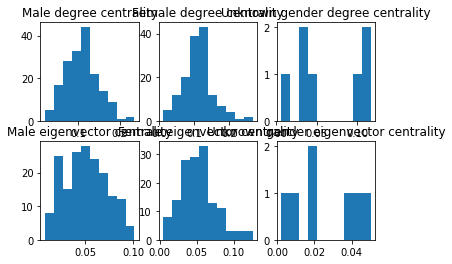

In [14]:
# degree and eigenvector centralities vs gender plots
fig, axes = pyplot.subplots(nrows=2, ncols=3)
(ax1, ax2, ax3, ax4, ax5, ax6) = axes.flatten()
ax1.hist(male_deg.degree_centrality)
ax2.hist(female_deg.degree_centrality)
ax3.hist(unknown_deg.degree_centrality)
ax4.hist(male_eigen.eigenvector_centrality)
ax5.hist(female_eigen.eigenvector_centrality)
ax6.hist(unknown_eigen.eigenvector_centrality)
ax1.set_title('Male degree centrality')
ax2.set_title('Female degree centrality')
ax3.set_title('Unknown gender degree centrality')
ax4.set_title('Male eigenvector centrality')
ax5.set_title('Female eigenvector centrality')
ax6.set_title('Unknown gender eigenvector centrality')
pyplot.show()

In [15]:
# t testing on the male and female means for degree and eigenvector centrality
t_test_degree_centrality = scipy.stats.ttest_ind(male_deg.degree_centrality, female_deg.degree_centrality)
print("t-test results for degree centrality - p-value: " + str(round(t_test_degree_centrality.pvalue, 4)))

t-test results for degree centrality - p-value: 0.4261


In [16]:
t_test_eigenvector_centrality = scipy.stats.ttest_ind(male_eigen.eigenvector_centrality, female_eigen.eigenvector_centrality)
print("t-test results for eigenvector centrality - p-value: " + str(round(t_test_eigenvector_centrality.pvalue, 4)))

t-test results for eigenvector centrality - p-value: 0.6444
